In [179]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
from fuzzywuzzy import fuzz #https://pypi.org/project/fuzzywuzzy/
#from fuzzywuzzy import process 
import matplotlib.pyplot as plt
import seaborn as sns
import time
# disable chained assignments
pd.options.mode.chained_assignment = None 


In [180]:
os.getcwd()

'C:\\Users\\s6438750\\Desktop\\files\\myw'

In [181]:
# Path of your file
path = "/Users/s6438750/Desktop/files/Winter Campaign F22/F22 Winter Campaign/New Account_Dbviz.csv"
 
# Path of Start directory
start = "/Users/s6438750/Desktop/files/myw"
  
# Compute the relative file path
# to the given path from the 
# the given start directory.
relative_path = os.path.relpath(path, start)
  
# Print the relative file path
# to the given path from the 
# the given start directory.
print(relative_path)

..\Winter Campaign F22\F22 Winter Campaign\New Account_Dbviz.csv


## Data Source 

In [182]:
itrade = pd.read_csv("..\Winter Campaign F22\F22 Winter Campaign\All Existing iTrade Clients.csv",encoding='unicode_escape',sep='\t')
na = pd.read_csv("..\Winter Campaign F22\F22 Winter Campaign\\New Account_Dbviz.csv",encoding='unicode_escape', sep='\t')
ec = pd.read_csv("..\Winter Campaign F22\F22 Winter Campaign\F22 Winter Campaign - Existing Clients.csv",encoding='unicode_escape')
be = pd.read_csv("..\Winter Campaign F22\F22 Winter Campaign\F22 Winter Campaign - BNS Employee.csv",encoding='unicode_escape')
exc = pd.read_csv("..\Winter Campaign F22\F22 Winter Campaign\F22 Winter Campaign Exception Form.csv")


#### Date

In [183]:
#Change Date
d_date ='2022-02-22'

In [184]:
d_date = datetime.strptime(d_date, '%Y-%m-%d') #convert to datetime (monday)
week_prior_start =  d_date - timedelta(days=8) #make sure is correct (sunday)
week_prior_end =  d_date - timedelta(days=2) #make sure is correct (saturday)
d_date = d_date.strftime('%Y-%m-%d') #convert back to string
week_prior_start = week_prior_start.strftime('%Y-%m-%d')
week_prior_end = week_prior_end.strftime('%Y-%m-%d')

'''
today = datetime.today()
d_date = today.strftime('%Y-%m-%d') #string
week_prior =  today - timedelta(weeks=1)
week_prior = week_prior.strftime('%Y-%m-%d')
'''

print("Today: ", d_date)
print("Week Prior (start): ", week_prior_start)
print("Week Prior (end): ", week_prior_end) 

# iTRADE Clients & Enrollment Count
print("\n \033[1m" + "-------",d_date,"-------" +'\033[0m' ,\
      "\niTRADE Clients:",len(itrade), \
      "\033[4m" +   "\n\nEnrollment Count" +'\033[0m' \
      "\n 1. New Accounts (DbVisualizer):" , len(na),  \
      "\n 2. Exceptions (SharePoint):" , len(exc),\
      "\n 3. Existing Clients (Salesforce):" , len(ec), \
      "\n 4. BNS Employees (Salesforce):" , len(be), \
      "\nTotal Enrollment:", len(na)+len(ec)+len(be)+len(exc)
     )

Today:  2022-02-22
Week Prior (start):  2022-02-14
Week Prior (end):  2022-02-20

 ------- 2022-02-22 ------- 
iTRADE Clients: 720951 

Enrollment Count
 1. New Accounts (DbVisualizer): 455 
 2. Exceptions (SharePoint): 820 
 3. Existing Clients (Salesforce): 274 
 4. BNS Employees (Salesforce): 63 
Total Enrollment: 1612


## Transform

In [185]:
column_order = ["Create Date","First Name","Last Name","Phone","Email","Client ID", "Offer", "Enrollment Date","Enrollment Source"]

### iTRADE

may take a while, b/c iTRADE has over 700,000 records

In [186]:
itrade['ClientUserID'].astype('int')

# First name in caps, and remove non-alphabet characters
itrade["First Name"]=itrade['ClientFirstName'].str.upper()
itrade['First Name']=itrade['ClientFirstName'].str.replace(r'[^a-zA-Z]', '',regex=True)

# last name in caps, and remove non-alphabet characters
itrade["Last Name"]=itrade['ClientLastName'].str.upper()
itrade['Last Name']=itrade['ClientLastName'].str.replace(r'[^a-zA-Z]', '',regex=True)

#email in caps
itrade['Email']=itrade['ClientEMailAddress'].str.upper()

#trim phone
itrade['Phone']=itrade['ClientPhoneNumber'].str.replace(r'\D+','', regex=True) # remove unwanted characters

#for phase 1 & 2
itrade['flpe']=itrade['First Name']+itrade['Last Name']+itrade['Phone']+itrade['Email'] 
itrade['flp']=itrade['First Name']+itrade['Last Name']+itrade['Phone']
itrade['fle']=itrade['First Name']+itrade['Last Name']+itrade['Email']
itrade['fe']=itrade['First Name']+itrade['Email']
itrade['fp']=itrade['First Name']+itrade['Phone']
itrade['pe']=itrade['Phone']+itrade['Email']

#for phase 3
itrade['lpe']=itrade['Last Name']+itrade['Phone']+itrade['Email']
itrade['le']=itrade['Last Name']+itrade['Email']
itrade['lp']=itrade['Last Name']+itrade['Phone']
itrade['pr_lpe_f']=np.nan
itrade['pr_le_f']=np.nan
itrade['pr_lp_f']=np.nan

#for phase 4
itrade['fl']=itrade['First Name']+itrade['Last Name']

itrade.head(3)

,ClientUserID,ClientFirstName,ClientLastName,ClientPhoneNumber,ClientEMailAddress,Client_CreateDate,First Name,Last Name,Email,Phone,...,fe,fp,pe,lpe,le,lp,pr_lpe_f,pr_le_f,pr_lp_f,fl
0,1,TAG TEST CARD,SPECIAL ACCESS,,CHRISTINA_MULLIN@E-SCOTIA.COM,1997-07-28 09:01:00,TAGTESTCARD,SPECIALACCESS,CHRISTINA_MULLIN@E-SCOTIA.COM,,...,TAGTESTCARDCHRISTINA_MULLIN@E-SCOTIA.COM,TAGTESTCARD,CHRISTINA_MULLIN@E-SCOTIA.COM,SPECIALACCESSCHRISTINA_MULLIN@E-SCOTIA.COM,SPECIALACCESSCHRISTINA_MULLIN@E-SCOTIA.COM,SPECIALACCESS,NaN,NaN,NaN,TAGTESTCARDSPECIALACCESS
1,10,ANDREW,SCIPIO DEL CAMPO,905 4688268,andrew.scipiodelcampo@gmail.com,2011-08-10 15:56:21,ANDREW,SCIPIODELCAMPO,ANDREW.SCIPIODELCAMPO@GMAIL.COM,9054688268,...,ANDREWANDREW.SCIPIODELCAMPO@GMAIL.COM,ANDREW9054688268,9054688268ANDREW.SCIPIODELCAMPO@GMAIL.COM,SCIPIODELCAMPO9054688268ANDREW.SCIPIODELCAMPO@...,SCIPIODELCAMPOANDREW.SCIPIODELCAMPO@GMAIL.COM,SCIPIODELCAMPO9054688268,NaN,NaN,NaN,ANDREWSCIPIODELCAMPO
2,100,DONALD,MACMULLEN,902 5641642,DMACMULLEN@ICLOUD.COM,2009-06-17 10:49:09,DONALD,MACMULLEN,DMACMULLEN@ICLOUD.COM,9025641642,...,DONALDDMACMULLEN@ICLOUD.COM,DONALD9025641642,9025641642DMACMULLEN@ICLOUD.COM,MACMULLEN9025641642DMACMULLEN@ICLOUD.COM,MACMULLENDMACMULLEN@ICLOUD.COM,MACMULLEN9025641642,NaN,NaN,NaN,DONALDMACMULLEN


### New Accounts

In [187]:
# clean df
na_2 = na[['ClientUserID','Description','Account_CreateDate']]
na_2['Enrollment Date'] =pd.to_datetime(na_2['Account_CreateDate'],format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
na_2.rename(columns={'ClientUserID': 'Client ID',"Description":"Offer",'Account_CreateDate': 'Create Date'}, inplace=True)
na_2["Enrollment Source"]="New Account Query"

# sort by account create date, take the most recent one if duplicate found
na_2=na_2.sort_values('Create Date',ascending=False) # new to old
na_2.reset_index(drop=True, inplace=True)
na_2=na_2.drop_duplicates('Client ID')

#re-order columns
na_2 = na_2.reindex(columns=column_order)

na_enrollments=len(na)
na_2_unique_clients=len(na_2['Client ID'].unique())
print("\033[4m" +   "New Accounts" +'\033[0m', \
      "\nTotal New Accounts Enrollments:",na_enrollments, \
      "\nUnique clients enrolled:",na_2_unique_clients)

na_2

New Accounts 
Total New Accounts Enrollments: 455 
Unique clients enrolled: 341


,Create Date,First Name,Last Name,Phone,Email,Client ID,Offer,Enrollment Date,Enrollment Source
0,2022-02-19 22:42:58,NaN,NaN,NaN,NaN,6934510,Cash Offer,2022-02-19,New Account Query
1,2022-02-19 21:49:02,NaN,NaN,NaN,NaN,7205076,Cash Offer,2022-02-19,New Account Query
2,2022-02-19 19:00:51,NaN,NaN,NaN,NaN,7205068,Cash Offer,2022-02-19,New Account Query
3,2022-02-19 18:42:35,NaN,NaN,NaN,NaN,7199348,Cash Offer,2022-02-19,New Account Query
4,2022-02-19 18:29:49,NaN,NaN,NaN,NaN,7205066,Free Trades offer,2022-02-19,New Account Query
...,...,...,...,...,...,...,...,...,...
448,2022-02-13 09:45:03,NaN,NaN,NaN,NaN,1782593,Cash Offer,2022-02-13,New Account Query
449,2022-02-13 08:32:03,NaN,NaN,NaN,NaN,7203608,Cash Offer,2022-02-13,New Account Query
452,2022-02-13 04:19:51,NaN,NaN,NaN,NaN,1459849,Cash Offer,2022-02-13,New Account Query
453,2022-02-13 03:03:44,NaN,NaN,NaN,NaN,7202235,Cash Offer,2022-02-13,New Account Query


### Exception Forms

In [188]:
exc_2= exc[["Client ID (Please do not add account numbers)","Offer selected","Enrollment Date (Date since when we should monitor funding) ","Created"]]

exc_2=exc_2.rename(columns={'Client ID (Please do not add account numbers)': 'Client ID',
                            "Offer selected":"Offer",
                            'Enrollment Date (Date since when we should monitor funding) ': 'Enrollment Date',
                            'Created':'Create Date'})

exc_2['Enrollment Date'] = pd.to_datetime(exc_2['Enrollment Date'],format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
exc_2["Enrollment Source"] = "Sharepoint Exception"
exc_2['Create Date'] = pd.to_datetime(exc_2['Create Date'],format='%m/%d/%Y %I:%M %p').dt.strftime('%Y-%m-%d %H:%M:%S')


#filter on (Create Date) previous week (does not include last week sunday, but does not matter because there are no enrollments on weekends)
exc_2 = exc_2[(exc_2['Create Date'] >= week_prior_start) & (exc_2['Create Date'] <= week_prior_end)]
exc_2_enrollments=len(exc_2) #use this week's

#sort by create date, take the most recent one if duplicate found 
exc_2=exc_2.sort_values('Create Date',ascending=False) # new to old
exc_2.reset_index(drop=True, inplace=True)
exc_2=exc_2.drop_duplicates('Client ID')

exc_2_unique_clients=len(exc_2['Client ID'].unique())

#re-order columns
exc_2 = exc_2.reindex(columns=column_order)

print("\033[4m" +   "Exceptions" +'\033[0m', \
"\nTotal Exception Enrollments:",exc_2_enrollments, \
"\nUnique clients enrolled:",exc_2_unique_clients) \

exc_2

Exceptions 
Total Exception Enrollments: 96 
Unique clients enrolled: 95


,Create Date,First Name,Last Name,Phone,Email,Client ID,Offer,Enrollment Date,Enrollment Source
0,2022-02-18 18:25:00,NaN,NaN,NaN,NaN,1066674.0,BNS Employee- Cash +$0* (TFT),2022-01-03,Sharepoint Exception
1,2022-02-18 18:07:00,NaN,NaN,NaN,NaN,77694.0,"Mass, Acquisition & Lifecycle -Free Trades (FT22)",2022-02-18,Sharepoint Exception
2,2022-02-18 18:00:00,NaN,NaN,NaN,NaN,64395.0,"Mass, Acquisition & Lifecycle - Cash +4.99 (C22)",2022-02-14,Sharepoint Exception
3,2022-02-18 17:37:00,NaN,NaN,NaN,NaN,7185846.0,"Mass, Acquisition & Lifecycle -Free Trades (FT22)",2022-02-18,Sharepoint Exception
4,2022-02-18 17:16:00,NaN,NaN,NaN,NaN,1388903.0,"Mass, Acquisition & Lifecycle -Free Trades (FT22)",2022-02-18,Sharepoint Exception
...,...,...,...,...,...,...,...,...,...
91,2022-02-14 11:24:00,NaN,NaN,NaN,NaN,7196717.0,"Mass, Acquisition & Lifecycle -Free Trades (FT22)",2022-02-14,Sharepoint Exception
92,2022-02-14 10:05:00,NaN,NaN,NaN,NaN,7133163.0,"Mass, Acquisition & Lifecycle - Cash +4.99 (C22)",2022-02-14,Sharepoint Exception
93,2022-02-14 09:04:00,NaN,NaN,NaN,NaN,1619003.0,"Mass, Acquisition & Lifecycle -Free Trades (FT22)",2022-02-14,Sharepoint Exception
94,2022-02-14 08:36:00,NaN,NaN,NaN,NaN,1644811.0,"Mass, Acquisition & Lifecycle - Cash +4.99 (C22)",2022-01-04,Sharepoint Exception


### Existing Clients

In [189]:
ec_2=ec[['Create Date','First Name','Last Name','Phone','Email','Which offer would you like to enroll in?']]
ec_2=ec_2.rename(columns={"Which offer would you like to enroll in?":"Offer"})
ec_2['Enrollment Date'] = pd.to_datetime(ec_2['Create Date'],format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
ec_2['Create Date'] = pd.to_datetime(ec_2['Create Date'],format='%d/%m/%Y').dt.strftime('%Y-%m-%d %H:%M:%S')

ec_2.dropna(subset=['Offer'], how='all', inplace=True) #drop rows which contains nan in offer column

ec_2["Enrollment Source"] = "Salesforce Existing Clients"

#sort by create date, take the most recent one if duplicate found (newest is at the top, oldest at the bottom)
# since enrollment date is not exact enough, we'll take the smaller index, since that would be the 2nd enrollment of the same client
ec_2=ec_2.sort_index(axis=0)
ec_2=ec_2.drop_duplicates(['First Name','Last Name','Phone','Email']) #defaults to keeping the first


ec_enrollments=len(ec)
ec_2_enrollments=len(ec_2)
#ec_unique_clients=len(ec['Client ID'].unique()) #cannot confirm yet
print("\033[4m" +   "Existing Clients" +'\033[0m', \
"\nTotal Existing Clients Enrollments:",ec_enrollments, \
 "\nUnique Existing Clients Enrollments:",ec_2_enrollments)

ec_2.head(3)


Existing Clients 
Total Existing Clients Enrollments: 274 
Unique Existing Clients Enrollments: 260


,Create Date,First Name,Last Name,Phone,Email,Offer,Enrollment Date,Enrollment Source
0,2022-02-19 00:00:00,Duhyun,Kim,(604) 704-5674,kduhyun@gmail.com,Cash and $4.99 stock and ETF commission pricing.,2022-02-19,Salesforce Existing Clients
1,2022-02-19 00:00:00,Sujin,Park,(604) 704-5677,ajtwla0623@yahoo.com,Cash and $4.99 stock and ETF commission pricing.,2022-02-19,Salesforce Existing Clients
2,2022-02-19 00:00:00,Dinah,Goldberg,(416) 200-4612,D_goldberg22@hotmail.com,Cash and $4.99 stock and ETF commission pricing.,2022-02-19,Salesforce Existing Clients


### BNS Employees

In [190]:
be_2=be[['Create Date','First Name','Last Name','Phone','Email','BNS Employee Option']]
be_2=be_2.rename(columns={"BNS Employee Option":"Offer"})
be_2['Enrollment Date']=pd.to_datetime(be_2['Create Date'],format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
be_2['Create Date'] = pd.to_datetime(be_2['Create Date'],format='%d/%m/%Y').dt.strftime('%Y-%m-%d %H:%M:%S')

#filter on TFT
be_2=be_2.loc[be_2["Offer"]=="I just want to enroll in the Cash + up to 500 free stock and ETF trades offer."]

be_2["Enrollment Source"] = "Salesforce BNS Employees"

#don't need to dedup based on create date because the enrollments are all TFT
be_2=be_2.drop_duplicates(['First Name','Last Name','Phone','Email']) #defaults to keeping the first

be_enrollments = len(be)
be_2_enrollments=len(be_2)
#ec_unique_clients=len(ec['Client ID'].unique()) #cannot confirm yet
print("\033[4m" +   "BNS Employees" +'\033[0m', \
        "\nTotal BNS Employees Enrollments:",be_enrollments,
        "\nUnique BNS Employees Enrollments:",be_2_enrollments)

be_2.head(3)

BNS Employees 
Total BNS Employees Enrollments: 63 
Unique BNS Employees Enrollments: 59


,Create Date,First Name,Last Name,Phone,Email,Offer,Enrollment Date,Enrollment Source
0,2022-02-19 00:00:00,Nico,Verrier,(604) 230-0970,nicoverrier22@gmail.com,I just want to enroll in the Cash + up to 500 ...,2022-02-19,Salesforce BNS Employees
1,2022-02-19 00:00:00,Nelson,Riquelme,(416) 859-5659,nelson.riquelme@scotiabank.com,I just want to enroll in the Cash + up to 500 ...,2022-02-19,Salesforce BNS Employees
2,2022-02-19 00:00:00,Norene,Lee,(647) 896-1799,norene23@hotmail.com,I just want to enroll in the Cash + up to 500 ...,2022-02-19,Salesforce BNS Employees


#### Existing Clients + BNS Employees

In [191]:
#combine existing clients and bns employees
ecbe = pd.concat([ec_2,be_2], ignore_index=True)

# First name in caps > remove accents, replace as normal char > remove non-alphabet characters (will also remove accented chars)
ecbe["First Name"]=ecbe['First Name'].str.upper()
ecbe['First Name']=ecbe['First Name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
ecbe['First Name']=ecbe['First Name'].str.replace(r'[^a-zA-Z]', '',regex=True)

# last name in caps> remove accents, replace as normal char > remove non-alphabet characters (will also remove accented chars)
ecbe["Last Name"]=ecbe['Last Name'].str.upper()
ecbe['Last Name']=ecbe['Last Name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
ecbe['Last Name']=ecbe['Last Name'].str.replace(r'[^a-zA-Z]', '',regex=True)

#email in caps
ecbe['Email']=ecbe['Email'].str.upper()

#trim phone
ecbe['Phone']=ecbe['Phone'].str.replace(r'\D+','', regex=True) # remove unwanted characters
#https://www3.ntu.edu.sg/home/ehchua/programming/howto/Regexe.html

#ecbe["Enrollment Source"] = "Salesforce Existing Clients"

# for phase 1 & 2
#1. firstname + lastname + trim(phone) + upper(email)
ecbe['flpe']=ecbe['First Name']+ecbe['Last Name']+ecbe['Phone']+ecbe['Email']
#2. firstname + lastname + trim(phone)
ecbe['flp']=ecbe['First Name']+ecbe['Last Name']+ecbe['Phone']
#3. firstname + lastname + upper(email)
ecbe['fle']=ecbe['First Name']+ecbe['Last Name']+ecbe['Email']
#4. firstname + upper(email)
ecbe['fe']=ecbe['First Name']+ecbe['Email']
#5. firstname + trim(phone)
ecbe['fp']=ecbe['First Name']+ecbe['Phone']
#6. trim(phone) + upper(email)
ecbe['pe']=ecbe['Phone']+ecbe['Email']

# for phase 3
ecbe['lpe']=ecbe['Last Name']+ecbe['Phone']+ecbe['Email']
ecbe['le']=ecbe['Last Name']+ecbe['Email']
ecbe['lp']=ecbe['Last Name']+ecbe['Phone']

# for phase 4
ecbe['fl']=ecbe['First Name']+ecbe['Last Name']


## Phase 1 : Match

In [192]:
def match(match_df):

    # matching keys
    '''have to dropna on the keys because some have NaN on email > causing flpe to be NaN > pandas would merge on NaN keys > so you have to exclude NaN or it will match with other NaN keys which would be wrong!'''
    a=match_df.merge(itrade[['flpe','ClientUserID']].dropna(subset = ['flpe']),on='flpe',how='left')
    a.rename(columns={'ClientUserID':'cid_flpe'}, inplace=True)
    
    a=a.merge(itrade[['flp','ClientUserID']].dropna(subset = ['flp']),on='flp',how='left')
    a.rename(columns={'ClientUserID':'cid_flp'}, inplace=True)

    a=a.merge(itrade[['fle','ClientUserID']].dropna(subset = ['fle']),on='fle',how='left')
    a.rename(columns={'ClientUserID':'cid_fle'}, inplace=True)

    a=a.merge(itrade[['fe','ClientUserID']].dropna(subset = ['fe']),on='fe',how='left')
    a.rename(columns={'ClientUserID':'cid_fe'}, inplace=True)

    a=a.merge(itrade[['fp','ClientUserID']].dropna(subset = ['fp']),on='fp',how='left')
    a.rename(columns={'ClientUserID':'cid_fp'}, inplace=True)

    a=a.merge(itrade[['pe','ClientUserID']].dropna(subset = ['pe']),on='pe',how='left') # idk (claire had the same key)
    a.rename(columns={'ClientUserID':'cid_pe'}, inplace=True)
    

    #fill cid (flpe -> flp -> fle -> fe -> fp -> pe)
    a['cid'] = np.where(a['cid_flpe'].isnull(), np.nan, a['cid_flpe'] )
    a.loc[a['cid'].isnull(),'cid'] = a['cid_flp']
    a.loc[a['cid'].isnull(),'cid'] = a['cid_fle']
    a.loc[a['cid'].isnull(),'cid'] = a['cid_fe']
    a.loc[a['cid'].isnull(),'cid'] = a['cid_fp']
    a.loc[a['cid'].isnull(),'cid'] = a['cid_pe']

    return a

In [193]:
start = time.time()

match_df = ecbe.copy()
lets_match=match(match_df)

time.sleep(1)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 6.762873888015747


In [194]:
key_success=pd.DataFrame({'key':  ['flpe', 'flp','fle','fe','fp'],'success_rate': [0,0,0,0,0]})
key_success.set_index('key',inplace=True)

key_success.loc['flpe','success_rate']="{:.1%}".format(lets_match['cid_flpe'].count()/lets_match['Enrollment Date'].count())
key_success.loc['flp','success_rate']="{:.1%}".format(lets_match['cid_flp'].count()/lets_match['Enrollment Date'].count())
key_success.loc['fle','success_rate']="{:.1%}".format(lets_match['cid_fle'].count()/lets_match['Enrollment Date'].count())
key_success.loc['fe','success_rate']="{:.1%}".format(lets_match['cid_fe'].count()/lets_match['Enrollment Date'].count())
key_success.loc['fp','success_rate']="{:.1%}".format(lets_match['cid_fp'].count()/lets_match['Enrollment Date'].count())
key_success.loc['pe','success_rate']="{:.1%}".format(lets_match['cid_pe'].count()/lets_match['Enrollment Date'].count())

key_success

,success_rate
key,
flpe,70.7%
flp,74.9%
fle,83.0%
fe,86.4%
fp,79.2%
pe,82.0%


In [195]:
a=lets_match[['Create Date','First Name','Last Name','Phone','Email','Offer','Enrollment Date','Enrollment Source', 
              'flpe', 'flp', 'fle', 'fe','fp', 'pe', 'lpe', 'le', 'lp', 'fl','cid']]
b=a.drop_duplicates(subset=['Create Date','Enrollment Date','First Name','Last Name','Phone','Email','Offer','Enrollment Source','cid'])
b.reset_index(drop=True, inplace=True)

print('\n* Phase 1: Matching Process (Existing Clients & BNS Employees)')
#matched
b_matched = b.loc[b['cid'].notnull()]
print('Matched:',len(b_matched))

#unmatched
b_unmatched=b.loc[b['cid'].isnull()]
print('Not Matched:',len(b_unmatched))


* Phase 1: Matching Process (Existing Clients & BNS Employees)
Matched: 310
Not Matched: 18


## Phase 2: Find

The finding keys should be specific as to pull one record only, if more than one record is found, it will get the first record

match first > find based on criteria : finds faster

In [196]:
def find_unmatched(find_df):

    for i,i_row in find_df.iterrows():
        
        #1. flp%
        temp_1= itrade['ClientUserID'].loc[itrade['flp'].str.startswith(i_row['flp'],na=False)]#.values
        #find_df.loc[i,'cid_flp%']=str(temp_1)[1:-1]
        if temp_1.size != 0:
            find_df.loc[i,'cid_flp%']=temp_1.values[0]
        del temp_1

        #2. =lastname & =trim(phone) & = upper(email) & First Name%
        temp_2= itrade.loc[(itrade['Last Name']==i_row['Last Name']) & (itrade['Phone']==i_row['Phone']) & (itrade['Email']==i_row['Email'])]
        temp_2= temp_2['ClientUserID'].loc[temp_2['First Name'].str.startswith(i_row['First Name'],na=False)]#.values
        #find_df.loc[i,'cid_f%lpe']=str(temp_2)[1:-1]
        if temp_2.size != 0:
            find_df.loc[i,'cid_f%lpe']=temp_2.values[0]
        del temp_2

        #3. =lastname &= upper(email) & First Name% 
        temp_3= itrade.loc[(itrade['Last Name']==i_row['Last Name']) & (itrade['Email']==i_row['Email'])]
        temp_3= temp_3['ClientUserID'].loc[temp_3['First Name'].str.startswith(i_row['First Name'],na=False)]#.values
        #find_df.loc[i,'cid_f%le']=str(temp_4)[1:-1]
        if temp_3.size != 0:
            find_df.loc[i,'cid_f%le']=temp_3.values[0]
        del temp_3
            
        #4. =lastname & =trim(phone) & First Name%
        temp_4= itrade.loc[(itrade['Last Name']==i_row['Last Name']) & (itrade['Phone']==i_row['Phone'])]
        temp_4= temp_4['ClientUserID'].loc[temp_4['First Name'].str.startswith(i_row['First Name'],na=False)]
        #find_df.loc[i,'cid_f%lp']=str(temp_4)[1:-1]
        if temp_4.size != 0:
            find_df.loc[i,'cid_f%lp']=temp_4.values[0]
        del temp_4    
        
        #5. =lastname & =trim(phone) &= upper(email) & %First Name% 
        temp_5= itrade[(itrade['Last Name']==i_row['Last Name']) & (itrade['Phone']==i_row['Phone']) & (itrade['Email']==i_row['Email'])]
        temp_5= temp_5['ClientUserID'].loc[itrade['First Name'].str.contains(i_row['First Name'],na=False)]#.values
        #find_df.loc[i,'cid_%f%lpe']=str(temp_5)[1:-1]
        if temp_5.size != 0:
            find_df.loc[i,'cid_%f%lpe']=temp_5.values[0]
        del temp_5
        
        #6. =lastname & = upper(email) & %First Name% 
        temp_6= itrade[(itrade['Last Name']==i_row['Last Name']) & (itrade['Email']==i_row['Email'])]
        temp_6= temp_6['ClientUserID'].loc[temp_6['First Name'].str.contains(i_row['First Name'],na=False)]#.values
        #find_df.loc[i,'cid_%f%le']=str(temp_6)[1:-1]
        if temp_6.size != 0:
            find_df.loc[i,'cid_%f%le']=temp_6.values[0]
        del temp_6
        
        #7. =lastname & =trim(phone) & %First Name% 
        temp_7= itrade[(itrade['Last Name']==i_row['Last Name']) & (itrade['Phone']==i_row['Phone'])]
        temp_7= temp_7['ClientUserID'].loc[temp_7['First Name'].str.contains(i_row['First Name'],na=False)]#.values
        #find_df.loc[i,'cid_%f%lp']=str(temp_7)[1:-1]
        if temp_7.size != 0:
            find_df.loc[i,'cid_%f%lp']=temp_7.values[0]
        del temp_7    
        
            
    find_df.loc[:,['cid_flp%','cid_f%lpe','cid_f%le','cid_f%lp','cid_%f%lpe','cid_%f%le','cid_%f%lp']]=find_df.loc[:,['cid_flp%','cid_f%lpe','cid_f%le','cid_f%lp','cid_%f%lpe','cid_%f%le','cid_%f%lp']].replace('', np.NaN)
    find_df.loc[:,['cid_flp%','cid_f%lpe','cid_f%le','cid_f%lp','cid_%f%lpe','cid_%f%le','cid_%f%lp']]=find_df.loc[:,['cid_flp%','cid_f%lpe','cid_f%le','cid_f%lp','cid_%f%lpe','cid_%f%le','cid_%f%lp']].astype(float)


    #fill cid based on priority (cid_flp% -> cid_f%lpe -> cid_f%le -> cid_f%lp -> cid_%f%lpe -> cid_%f%le -> cid_%f%lp)
    find_df['cid'] = np.where(find_df['cid_flp%'].isnull(), np.nan, find_df['cid_flp%'])
    find_df.loc[find_df['cid'].isnull(),'cid'] = find_df['cid_f%lpe']
    find_df.loc[find_df['cid'].isnull(),'cid'] = find_df['cid_f%le']
    find_df.loc[find_df['cid'].isnull(),'cid'] = find_df['cid_f%lp']
    find_df.loc[find_df['cid'].isnull(),'cid'] = find_df['cid_%f%lpe']
    find_df.loc[find_df['cid'].isnull(),'cid'] = find_df['cid_%f%le']
    find_df.loc[find_df['cid'].isnull(),'cid'] = find_df['cid_%f%lp']

    return find_df

In [197]:
start = time.time()

find_df = b_unmatched.copy()

find_df['cid_flp%'] = np.nan
find_df['cid_f%lpe'] = np.nan
find_df['cid_f%le'] = np.nan
find_df['cid_f%lp'] = np.nan
find_df['cid_%f%lpe'] = np.nan
find_df['cid_%f%le'] = np.nan
find_df['cid_%f%lp'] =np.nan

lets_find=find_unmatched(find_df)

time.sleep(1)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 42.406033754348755


In [198]:
key_success=pd.DataFrame({'key':  ['flp%','f%lpe','f%le','f%lp','%f%lpe','%f%le','%f%lp'],'success_rate': [0,0,0,0,0,0,0]})
key_success.set_index('key',inplace=True)

key_success.loc['flp%','success_rate']="{:.1%}".format(lets_find['cid_flp%'].count()/lets_find['Enrollment Date'].count())
key_success.loc['f%lpe','success_rate']="{:.1%}".format(lets_find['cid_f%lpe'].count()/lets_find['Enrollment Date'].count())
key_success.loc['f%le','success_rate']="{:.1%}".format(lets_find['cid_f%le'].count()/lets_find['Enrollment Date'].count())
key_success.loc['f%lp','success_rate']="{:.1%}".format(lets_find['cid_f%lp'].count()/lets_find['Enrollment Date'].count())
key_success.loc['%f%lpe','success_rate']="{:.1%}".format(lets_find['cid_%f%lpe'].count()/lets_find['Enrollment Date'].count())
key_success.loc['%f%le','success_rate']="{:.1%}".format(lets_find['cid_%f%le'].count()/lets_find['Enrollment Date'].count())
key_success.loc['%f%lp','success_rate']="{:.1%}".format(lets_find['cid_%f%lp'].count()/lets_find['Enrollment Date'].count())

key_success

,success_rate
key,
flp%,0.0%
f%lpe,0.0%
f%le,16.7%
f%lp,0.0%
%f%lpe,0.0%
%f%le,16.7%
%f%lp,0.0%


In [199]:
b_unmatched_done = lets_find.loc[lets_find['cid'].notnull()]

c = b.copy()
c = c.drop_duplicates()

# updating the cid of the found records to the original df (b => c), since the index would still be the same, we will use the index to match with that record
for index, row in b_unmatched_done.iterrows():
    c['cid'].iloc[index]=row['cid']

print('\n* Phase 2: Finding Process (Existing Clients & BNS Employees)')

#found
c_found = c.loc[c['cid'].notnull()]
print('Found:',len(c_found))

#not found
c_notfound = c.loc[c['cid'].isnull()] 
print('Not Found:',len(c_notfound))

c_found['cid'] = c_found['cid'].astype(int)
c_found = c_found.rename(columns={"cid":"Client ID"})
c_found = c_found.reindex(columns=column_order)


* Phase 2: Finding Process (Existing Clients & BNS Employees)
Found: 313
Not Found: 15


In [200]:
c_found

,Create Date,First Name,Last Name,Phone,Email,Client ID,Offer,Enrollment Date,Enrollment Source
0,2022-02-19 00:00:00,DUHYUN,KIM,6047045674,KDUHYUN@GMAIL.COM,7202733,Cash and $4.99 stock and ETF commission pricing.,2022-02-19,Salesforce Existing Clients
1,2022-02-19 00:00:00,SUJIN,PARK,6047045677,AJTWLA0623@YAHOO.COM,6934510,Cash and $4.99 stock and ETF commission pricing.,2022-02-19,Salesforce Existing Clients
2,2022-02-19 00:00:00,DINAH,GOLDBERG,4162004612,D_GOLDBERG22@HOTMAIL.COM,1429532,Cash and $4.99 stock and ETF commission pricing.,2022-02-19,Salesforce Existing Clients
3,2022-02-19 00:00:00,CHANTEL,VANBUREN,4039387060,CHANTELVANBUREN@HOTMAIL.COM,1073420,Cash and $4.99 stock and ETF commission pricing.,2022-02-19,Salesforce Existing Clients
4,2022-02-19 00:00:00,LILI,ZHENG,9058846671,MICHAEL_X_GAO@HOTMAIL.COM,7117997,Cash and $4.99 stock and ETF commission pricing.,2022-02-19,Salesforce Existing Clients
...,...,...,...,...,...,...,...,...,...
323,2022-02-13 00:00:00,ANDREW,DILLON,4164493737,ANDREW.DILLON@ROGERS.COM,6733,I just want to enroll in the Cash + up to 500 ...,2022-02-13,Salesforce BNS Employees
324,2022-02-13 00:00:00,TANYA,PARAMAPATHY,7805547307,TANYA.PARAMAPATHY@GMAIL.COM,6960815,I just want to enroll in the Cash + up to 500 ...,2022-02-13,Salesforce BNS Employees
325,2022-02-13 00:00:00,RONGJOYCE,YANG,4166169706,JOYCE.YANG@SCOTIABANK.COM,1445252,I just want to enroll in the Cash + up to 500 ...,2022-02-13,Salesforce BNS Employees
326,2022-02-13 00:00:00,YINGER,CHEN,7788837862,YINGER617@HOTMAIL.COM,1746856,I just want to enroll in the Cash + up to 500 ...,2022-02-13,Salesforce BNS Employees


## Phase 3 : Approximate Matching

ex: MUHAMMADT(df) vs MUHAMMAD(itrade) would not be found so use approx w/ fuzzywuzzy

creates a temporary table from itrade for each key, then doing partial ratio on the first name
1. lpe_f : match on lastname, phone, email > partial ratio on f (we only do fuzzywuzzy on the temp table because might be more accurate and reliable??? and also to avoid false positives)
2. le_f : match on lastname and email > partial ratio on f
3. lp_f : match on lastname and phone > partial ratio on f

we cannot do fuzzywuzzy on flpe, fle, flp alone, because this would create false positives
1. fuzz.ratio('applewong123467890','mikewong123467890') = 80
2. fuzz.partial_ratio('applewong123467890','mikewong123467890') = 82


In [201]:
def approx_match(approx):

    # partial firt name on itrade vs name+extra on table
    for i, i_row in approx.iterrows():

        ''' 1. lpe_f '''
        #create a temporary table for itrade, for those that matches for the chosen record on b_unmatched
        temp_itrade_lpe = itrade.loc[itrade['lpe']==approx.loc[i,'lpe']]

        for j,j_row in temp_itrade_lpe.iterrows():
            temp_itrade_lpe.loc[j,'pr_lpe_f']=fuzz.partial_ratio(i_row['First Name'],j_row['First Name'])

        #take the record with the highest partial ratio
        best_pr_lpe_f = temp_itrade_lpe[temp_itrade_lpe['pr_lpe_f']==temp_itrade_lpe['pr_lpe_f'].max()]

        #pass on the values from the temp_itrade that has the best partial ratio
        if not best_pr_lpe_f.empty:
            approx.loc[i,'pr_lpe_f'] = best_pr_lpe_f.iloc[[0]]['pr_lpe_f'].values
            approx.loc[i,'cid_lpe_f'] = best_pr_lpe_f.iloc[[0]]['ClientUserID'].values    

        #clear df so that those records that does not match on le can be nan, otherwise will still pass on the dfeven when temp_itrade is empty
        del best_pr_lpe_f 

        ''' 2. le_f ''' 
        temp_itrade_le = itrade.loc[itrade['le']==approx.loc[i,'le']]

        for k,k_row in temp_itrade_le.iterrows():
            temp_itrade_le.loc[k,'pr_le_f']=fuzz.partial_ratio(i_row['First Name'],k_row['First Name'])

        best_pr_le_f = temp_itrade_le[temp_itrade_le['pr_le_f']==temp_itrade_le['pr_le_f'].max()]

        if not best_pr_le_f.empty:
            approx.loc[i,'pr_le_f'] = best_pr_le_f.iloc[[0]]['pr_le_f'].values
            approx.loc[i,'cid_le_f'] = best_pr_le_f.iloc[[0]]['ClientUserID'].values        

        del best_pr_le_f 


        ''' 3. lp_f '''
        temp_itrade_lp = itrade.loc[itrade['lp']==approx.loc[i,'lp']]

        for l,l_row in temp_itrade_lp.iterrows():
            temp_itrade_lp.loc[l,'pr_lp_f']=fuzz.partial_ratio(i_row['First Name'],l_row['First Name'])   

        best_pr_lp_f = temp_itrade_lp[temp_itrade_lp['pr_lp_f']==temp_itrade_lp['pr_lp_f'].max()]  

        if not best_pr_lp_f.empty:
            approx.loc[i,'pr_lp_f'] = best_pr_lp_f.iloc[[0]]['pr_lp_f'].values
            approx.loc[i,'cid_lp_f'] = best_pr_lp_f.iloc[[0]]['ClientUserID'].values

        del best_pr_lp_f 

    #https://stackoverflow.com/questions/37428218/how-to-properly-apply-a-lambda-function-into-a-pandas-data-frame-column
    # maybe can use lambda to make process faster
    approx.loc[(approx['cid'].isnull()) & (approx['pr_lpe_f']>=80),'cid'] = approx['cid_lpe_f']
    approx.loc[(approx['cid'].isnull()) & (approx['pr_le_f']>=80),'cid'] = approx['cid_le_f']
    approx.loc[(approx['cid'].isnull()) & (approx['pr_lp_f']>=80),'cid'] = approx['cid_lp_f']


    return approx

In [202]:
start = time.time()

approx=c_notfound.copy()

approx['cid_lpe_f']=np.nan
approx['cid_le_f']=np.nan
approx['cid_lp_f']=np.nan

approx['pr_lpe_f']=np.nan
approx['pr_le_f']=np.nan
approx['pr_lp_f']=np.nan

lets_approx= approx_match(approx)

time.sleep(1)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 5.946249008178711


In [203]:
key_success=pd.DataFrame({'key':  ['lpe_f','le_f','lp_f'],'success_rate': [0,0,0]})
key_success.set_index('key',inplace=True)

key_success.loc['lpe_f','success_rate']="{:.1%}".format(lets_approx['cid_lpe_f'].count()/lets_approx['Enrollment Date'].count())
key_success.loc['le_f','success_rate']="{:.1%}".format(lets_approx['cid_le_f'].count()/lets_approx['Enrollment Date'].count())
key_success.loc['lp_f','success_rate']="{:.1%}".format(lets_approx['cid_lp_f'].count()/lets_approx['Enrollment Date'].count())

key_success

,success_rate
key,
lpe_f,0.0%
le_f,20.0%
lp_f,0.0%


In [204]:
c_notfound_done = lets_approx.loc[lets_approx['cid'].notnull()]

d = c.copy()
d = d.drop_duplicates()

# updating the cid of the found records to the original df (b => c), since the index would still be the same, we will use the index to match with that record
for index, row in c_notfound_done.iterrows():
    d['cid'].iloc[index]=row['cid']

print('\n* Phase 3: Approximate Matching (Existing Clients & BNS Employees)')

#approximate matched
d_apprmatched = d.loc[d['cid'].notnull()]
print('cid:',len(d_apprmatched))

#approximate not matched
d_notapprmatched  = d.loc[d['cid'].isnull()] 
print('no cid:',len(d_notapprmatched))

d_apprmatched['cid'] = d_apprmatched['cid'].astype(int)
d_apprmatched = d_apprmatched.rename(columns={"cid":"Client ID"})
d_apprmatched = d_apprmatched.reindex(columns=column_order)


* Phase 3: Approximate Matching (Existing Clients & BNS Employees)
cid: 314
no cid: 14


## Phase 4 : Only One

In [205]:
def findone(onlyone):
    
    for i, i_row in onlyone.iterrows():

            #create a temporary table for itrade, for those that matches for the chosen record
            temp_itrade_fl = itrade.loc[itrade['fl']==onlyone.loc[i,'fl']]
            if len(temp_itrade_fl)==1:
                onlyone.loc[i,'cid_fl']=temp_itrade_fl['ClientUserID'].values

            #clear df so that those records that does not match on le can be nan, otherwise will still pass on the dfeven when temp_itrade is empty
            del temp_itrade_fl 
            
    onlyone.loc[(onlyone['cid'].isnull()),'cid'] = onlyone['cid_fl']
            
    return onlyone

In [206]:
start = time.time()

onlyone = d_notapprmatched.copy()
onlyone['cid_fl']=np.nan

lets_findone=findone(onlyone)

time.sleep(1)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 2.3297622203826904


In [207]:
d_notapprmatched_done = lets_findone.loc[lets_findone['cid'].notnull()]

e = d.copy()
e = e.drop_duplicates()

# updating the cid of the found records to the original df (b => c), since the index would still be the same, we will use the index to match with that record
for index, row in d_notapprmatched_done.iterrows():
    e['cid'].iloc[index]=row['cid']

print('\n* Phase 4: Get Only One if found (Existing Clients & BNS Employees)')

#only one matched
e_matched = e.loc[e['cid'].notnull()]
print('cid:',len(e_matched))

#not matched
e_unmatched  = e.loc[e['cid'].isnull()] 
print('no cid:',len(e_unmatched))

e_matched['cid'] = e_matched['cid'].astype(int)
e_matched = e_matched.rename(columns={"cid":"Client ID"})
e_matched = e_matched.reindex(columns=column_order)


* Phase 4: Get Only One if found (Existing Clients & BNS Employees)
cid: 322
no cid: 6


In [208]:
e_unmatched

,Create Date,First Name,Last Name,Phone,Email,Offer,Enrollment Date,Enrollment Source,flpe,flp,fle,fe,fp,pe,lpe,le,lp,fl,cid
7,2022-02-19 00:00:00,HANSHENGHENRY,CHEN,6047250926,HENRY@FORTUNEVALVE.COM,Cash and $4.99 stock and ETF commission pricing.,2022-02-19,Salesforce Existing Clients,HANSHENGHENRYCHEN6047250926HENRY@FORTUNEVALVE.COM,HANSHENGHENRYCHEN6047250926,HANSHENGHENRYCHENHENRY@FORTUNEVALVE.COM,HANSHENGHENRYHENRY@FORTUNEVALVE.COM,HANSHENGHENRY6047250926,6047250926HENRY@FORTUNEVALVE.COM,CHEN6047250926HENRY@FORTUNEVALVE.COM,CHENHENRY@FORTUNEVALVE.COM,CHEN6047250926,HANSHENGHENRYCHEN,NaN
150,2022-02-15 00:00:00,MIKE,MCINTYRE,5198162416,MIKEM@ITSWIN.COM,Cash and $4.99 stock and ETF commission pricing.,2022-02-15,Salesforce Existing Clients,MIKEMCINTYRE5198162416MIKEM@ITSWIN.COM,MIKEMCINTYRE5198162416,MIKEMCINTYREMIKEM@ITSWIN.COM,MIKEMIKEM@ITSWIN.COM,MIKE5198162416,5198162416MIKEM@ITSWIN.COM,MCINTYRE5198162416MIKEM@ITSWIN.COM,MCINTYREMIKEM@ITSWIN.COM,MCINTYRE5198162416,MIKEMCINTYRE,NaN
317,2022-02-14 00:00:00,SYLTA,HELLNER,9544827224,ARNOHELLNER@GMAIL.COM,I just want to enroll in the Cash + up to 500 ...,2022-02-14,Salesforce BNS Employees,SYLTAHELLNER9544827224ARNOHELLNER@GMAIL.COM,SYLTAHELLNER9544827224,SYLTAHELLNERARNOHELLNER@GMAIL.COM,SYLTAARNOHELLNER@GMAIL.COM,SYLTA9544827224,9544827224ARNOHELLNER@GMAIL.COM,HELLNER9544827224ARNOHELLNER@GMAIL.COM,HELLNERARNOHELLNER@GMAIL.COM,HELLNER9544827224,SYLTAHELLNER,NaN
318,2022-02-14 00:00:00,HANNA,HELLNER,9544827224,ARNOHELLNER@GMAIL.COM,I just want to enroll in the Cash + up to 500 ...,2022-02-14,Salesforce BNS Employees,HANNAHELLNER9544827224ARNOHELLNER@GMAIL.COM,HANNAHELLNER9544827224,HANNAHELLNERARNOHELLNER@GMAIL.COM,HANNAARNOHELLNER@GMAIL.COM,HANNA9544827224,9544827224ARNOHELLNER@GMAIL.COM,HELLNER9544827224ARNOHELLNER@GMAIL.COM,HELLNERARNOHELLNER@GMAIL.COM,HELLNER9544827224,HANNAHELLNER,NaN
319,2022-02-14 00:00:00,ARNO,HELLNER,9544827224,ARNOHELLNER@GMAIL.COM,I just want to enroll in the Cash + up to 500 ...,2022-02-14,Salesforce BNS Employees,ARNOHELLNER9544827224ARNOHELLNER@GMAIL.COM,ARNOHELLNER9544827224,ARNOHELLNERARNOHELLNER@GMAIL.COM,ARNOARNOHELLNER@GMAIL.COM,ARNO9544827224,9544827224ARNOHELLNER@GMAIL.COM,HELLNER9544827224ARNOHELLNER@GMAIL.COM,HELLNERARNOHELLNER@GMAIL.COM,HELLNER9544827224,ARNOHELLNER,NaN
321,2022-02-14 00:00:00,SUKYIN,HUNG,9053051321,SHIRLEYHUNG01@HOTMAIL.COM,I just want to enroll in the Cash + up to 500 ...,2022-02-14,Salesforce BNS Employees,SUKYINHUNG9053051321SHIRLEYHUNG01@HOTMAIL.COM,SUKYINHUNG9053051321,SUKYINHUNGSHIRLEYHUNG01@HOTMAIL.COM,SUKYINSHIRLEYHUNG01@HOTMAIL.COM,SUKYIN9053051321,9053051321SHIRLEYHUNG01@HOTMAIL.COM,HUNG9053051321SHIRLEYHUNG01@HOTMAIL.COM,HUNGSHIRLEYHUNG01@HOTMAIL.COM,HUNG9053051321,SUKYINHUNG,NaN


In [209]:
e_matched

,Create Date,First Name,Last Name,Phone,Email,Client ID,Offer,Enrollment Date,Enrollment Source
0,2022-02-19 00:00:00,DUHYUN,KIM,6047045674,KDUHYUN@GMAIL.COM,7202733,Cash and $4.99 stock and ETF commission pricing.,2022-02-19,Salesforce Existing Clients
1,2022-02-19 00:00:00,SUJIN,PARK,6047045677,AJTWLA0623@YAHOO.COM,6934510,Cash and $4.99 stock and ETF commission pricing.,2022-02-19,Salesforce Existing Clients
2,2022-02-19 00:00:00,DINAH,GOLDBERG,4162004612,D_GOLDBERG22@HOTMAIL.COM,1429532,Cash and $4.99 stock and ETF commission pricing.,2022-02-19,Salesforce Existing Clients
3,2022-02-19 00:00:00,CHANTEL,VANBUREN,4039387060,CHANTELVANBUREN@HOTMAIL.COM,1073420,Cash and $4.99 stock and ETF commission pricing.,2022-02-19,Salesforce Existing Clients
4,2022-02-19 00:00:00,LILI,ZHENG,9058846671,MICHAEL_X_GAO@HOTMAIL.COM,7117997,Cash and $4.99 stock and ETF commission pricing.,2022-02-19,Salesforce Existing Clients
...,...,...,...,...,...,...,...,...,...
323,2022-02-13 00:00:00,ANDREW,DILLON,4164493737,ANDREW.DILLON@ROGERS.COM,6733,I just want to enroll in the Cash + up to 500 ...,2022-02-13,Salesforce BNS Employees
324,2022-02-13 00:00:00,TANYA,PARAMAPATHY,7805547307,TANYA.PARAMAPATHY@GMAIL.COM,6960815,I just want to enroll in the Cash + up to 500 ...,2022-02-13,Salesforce BNS Employees
325,2022-02-13 00:00:00,RONGJOYCE,YANG,4166169706,JOYCE.YANG@SCOTIABANK.COM,1445252,I just want to enroll in the Cash + up to 500 ...,2022-02-13,Salesforce BNS Employees
326,2022-02-13 00:00:00,YINGER,CHEN,7788837862,YINGER617@HOTMAIL.COM,1746856,I just want to enroll in the Cash + up to 500 ...,2022-02-13,Salesforce BNS Employees


## Combine all

In [210]:
def map_offers(map_df):
    
    offers_dict = {
                    #new accounts
                    'Free Trades offer': 'FT22', 
                   'Cash Offer': 'C22', 
                   'Targeted Free Trades': 'TFT',
                   
                   #exception
                   'Mass, Acquisition & Lifecycle - Cash +4.99 (C22)':'C22',
                   'Mass, Acquisition & Lifecycle -Free Trades (FT22)':'FT22',
                   'BNS Employee- Cash +$0* (TFT)':'TFT',
                   
                   #existing clients
                   'Cash and $4.99 stock and ETF commission pricing.': 'C22',
                   'Free stock and ETF trades.':'FT22' ,
                   'Prime et commission de 4,99 $ applicable aux opérations sur actions et FNB.':'C22' ,
                   'Opérations sur actions et FNB gratuites.':'FT22',
            
                    #BNS Employees
                    'I just want to enroll in the Cash + up to 500 free stock and ETF trades offer.':'TFT', 
                    'Je veux bénéficier de l?offre pour recevoir une prime en espèces et jusqu?à 500 opérations sur actions et FNB gratuites.':'TFT',
                    'C22':'C22',
                    'FT22':'FT22',
                    'TFT':'TFT'
                    }

    # Remap the values of the dataframe
    map_df['Offer']= map_df['Offer'].map(offers_dict)

    return map_df

In [329]:
all_enrollments = pd.concat([na_2,exc_2,e_matched])

map_df=all_enrollments
lets_map=map_offers(map_df)

# lets_map vs all_enrollments
fin=lets_map
len(fin)

758

### Binary Duplicates Removal
- using binary table to account for all combinations
- OECS (Offer, Enrollment Date, Create Date, Enrollment Source)

|Check|abbrev|binary|
|----|-----|------|
|same|s|0|
|different|d|1|

- ex: OECS = 1010 => means that the duplicates (Client ID) have "different offer, same enrollment date, different create date, same enrollment source"
- removed from the 0000 to 1111 (moving from the simplest to the most complicated, not from 1111 to 0000, as this will cause false positives)
- be reminded and careful that drop_duplicates will also remove nan

In [334]:
def binaryremoval(fin):
    #priority level sort
    source_sort = {'Sharepoint Exception': 0, 'New Account Query': 1, 'Salesforce BNS Employees':2,'Salesforce Existing Clients':3} 
    offer_sort = {'TFT': 0, 'C22': 1, 'FT22':2} 

    # 1. 0, 0, 0, 0
    # fin[fin.duplicated(['Client ID', 'Offer','Enrollment Date','Create Date','Enrollment Source'],keep=False)].sort_values('Client ID') #for check
    fin1 = fin.drop_duplicates(subset=['Client ID', 'Offer','Enrollment Date','Create Date','Enrollment Source'])

    # 2. 1, 0, 0, 0
    #fin[fin.duplicated(['Client ID','Enrollment Date','Create Date','Enrollment Source'],keep=False)].sort_values('Client ID')
    # cannot use smaller index because client could enroll from different sources.
    fin2 = fin1.sort_index()
    fin2 = fin2.drop_duplicates(subset=['Client ID','Enrollment Date','Create Date','Enrollment Source'])

    #3. 0, 0, 1, 1
    #fin[fin.duplicated(['Client ID','Create Date','Enrollment Source'],keep=False)].sort_values('Client ID')
    fin3 = fin2.drop_duplicates(subset=['Client ID','Offer','Enrollment Date'],keep='last') # last or first does not matter, but i'll take the first input for this one

    #4. 0, 1, 0, 1
    #fin[fin.duplicated(['Client ID','Offer','Create Date'],keep=False)].sort_values('Client ID')
    fin4 = fin3.sort_values('Enrollment Date', ascending=True)
    fin = fin.drop_duplicates(subset=['Client ID','Offer','Create Date'])

    #5. 0, 1, 1, 0
    #fin[fin.duplicated(['Client ID','Offer','Enrollment Source'],keep=False)].sort_values('Client ID')
    fin5 = fin4.sort_values('Enrollment Date', ascending=True)
    fin5 = fin5.drop_duplicates(subset=['Client ID','Offer','Enrollment Source'])

    #6. 1, 0, 0, 1
    #fin[fin.duplicated(['Client ID','Enrollment Date','Create Date'],keep=False)].sort_values('Client ID')
    fin6 = fin5.sort_values(by=['Enrollment Source'], key=lambda x: x.map(source_sort))
    fin6 = fin6.drop_duplicates(["Client ID","Enrollment Date","Create Date"]) #defaults keeping the first record , agents better be enrolling the correct enrollment dates!

    #7. 1, 0, 1, 0
    #fin[fin.duplicated(['Client ID','Enrollment Date','Enrollment Source'],keep=False)].sort_values('Client ID')
    fin7 = fin6.sort_values('Create Date', ascending=False)
    fin7 = fin7.drop_duplicates(subset=['Client ID','Enrollment Date','Enrollment Source'])

    #8. 1, 1, 0, 0
    #fin[fin.duplicated(['Client ID','Create Date','Enrollment Source'],keep=False)].sort_values('Client ID')
    fin8 = fin7.sort_index()
    fin8 = fin8.drop_duplicates(subset=['Client ID','Create Date','Enrollment Source']) 

    #9. 1, 1, 1, 0
    #fin[fin.duplicated(['Client ID','Enrollment Source'],keep=False)].sort_values('Client ID')
    fin9 = fin8.sort_values('Create Date', ascending=False)
    fin9 = fin9.drop_duplicates(subset=['Client ID','Enrollment Source']) 

    #10. 0, 1, 1, 1
    #fin[fin.duplicated(['Client ID','Offer'],keep=False)].sort_values('Client ID')
    fin10 = fin9.sort_values('Enrollment Date', ascending=True) #take earliest E
    fin10 = fin10.drop_duplicates(subset=['Client ID','Offer']) 

    #11. 1, 1, 0, 1
    #fin[fin.duplicated(['Client ID','Create Date'],keep=False)].sort_values('Client ID')
    fin11 = fin10.sort_values(by=['Enrollment Source'], key=lambda x: x.map(source_sort))
    fin11 = fin11.drop_duplicates(["Client ID","Create Date"])

    #12. 1, 0, 1, 1
    #fin[fin.duplicated(['Client ID','Enrollment Date'],keep=False)].sort_values('Client ID')
    fin12 = fin11.sort_values('Create Date', ascending=False)
    fin12 = fin12.drop_duplicates(subset=['Client ID','Enrollment Date'])

    #13. 1, 1, 1, 1
    #fin[fin.duplicated(['Client ID'],keep=False)].sort_values('Client ID')
    fin13 = fin12.sort_values('Create Date', ascending=False)
    fin13 = fin13.drop_duplicates(subset=['Client ID']) 
    
    return fin13

In [335]:
#lets_map[lets_map.duplicated(['Client ID','Create Date','Enrollment Source'],keep=False)].sort_values('Client ID').to_excel("dup_cid.xlsx")

In [341]:
lets_bin = binaryremoval(fin)
fin_enrollments = lets_bin

#fin_enrollments.reset_index(drop=True, inplace=True)

fin_enrollments['Enrollment Date']=pd.to_datetime(fin_enrollments['Enrollment Date'],format='%Y-%m-%d')
fin_enrollments = fin_enrollments.reindex(columns=column_order)
fin_enrollments=fin_enrollments.fillna('')
len(final_enrollments)

730

### Unmatched

In [339]:
e_unmatched.reset_index(drop=True, inplace=True)

map_df=e_unmatched
lets_map=map_offers(map_df)
e_unmatched = lets_map
e_unmatched=e_unmatched.rename(columns={"cid":"Client ID"})
e_unmatched = e_unmatched.reindex(columns=column_order)
e_unmatched['Enrollment Date']=pd.to_datetime(e_unmatched['Enrollment Date'],format='%Y-%m-%d')

e_unmatched

,Create Date,First Name,Last Name,Phone,Email,Client ID,Offer,Enrollment Date,Enrollment Source
0,2022-02-19 00:00:00,HANSHENGHENRY,CHEN,6047250926,HENRY@FORTUNEVALVE.COM,NaN,C22,2022-02-19,Salesforce Existing Clients
1,2022-02-15 00:00:00,MIKE,MCINTYRE,5198162416,MIKEM@ITSWIN.COM,NaN,C22,2022-02-15,Salesforce Existing Clients
2,2022-02-14 00:00:00,SYLTA,HELLNER,9544827224,ARNOHELLNER@GMAIL.COM,NaN,TFT,2022-02-14,Salesforce BNS Employees
3,2022-02-14 00:00:00,HANNA,HELLNER,9544827224,ARNOHELLNER@GMAIL.COM,NaN,TFT,2022-02-14,Salesforce BNS Employees
4,2022-02-14 00:00:00,ARNO,HELLNER,9544827224,ARNOHELLNER@GMAIL.COM,NaN,TFT,2022-02-14,Salesforce BNS Employees
5,2022-02-14 00:00:00,SUKYIN,HUNG,9053051321,SHIRLEYHUNG01@HOTMAIL.COM,NaN,TFT,2022-02-14,Salesforce BNS Employees


In [340]:
ready = len(fin_enrollments)
not_ready = len(e_unmatched)
print("\033[4m" +   '\nAll Enrollments' +'\033[0m',\
      '\nFound:',ready,\
    '\nNot Found:',not_ready,\
     '\nTotal:',(ready+not_ready))



All Enrollments 
Found: 730 
Not Found: 6 
Total: 736


## Output

In [61]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('New_Enrollments_'+d_date+'.xlsx', engine='xlsxwriter',datetime_format='yyyy-mm-dd')

# Write each dataframe to a different worksheet.
fin_enrollments.to_excel(writer,sheet_name='Ready',index=False)
e_unmatched.to_excel(writer,sheet_name='Not Ready',index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [ ]:
#writer.close()

# Figure

In [238]:
#enroll_pivot=all_enrollments.pivot_table(index='Enrollment Date', columns='Offer',aggfunc='count')['Client ID']
enroll_pivot_data=fin_enrollments.copy()
enroll_pivot_data['Enrollment Date']=enroll_pivot_data['Enrollment Date'].dt.strftime('%Y-%m-%d')
enroll_pivot=enroll_pivot_data.pivot_table(index='Enrollment Date', columns='Offer',aggfunc='count',margins = True,margins_name = 'Total')['Client ID']

enroll_pivot = enroll_pivot.fillna(0).astype(int)
#enroll_pivot['Total'] = enroll_pivot.sum(axis=1)
#enroll_pivot['Total_Offers'] = enroll_pivot.sum(axis=0)
enroll_pivot

Offer,C22,FT22,TFT,Total
Enrollment Date,,,,
2021-12-13,1,0,0,1
2021-12-14,2,0,0,2
2021-12-29,0,1,0,1
2022-01-01,2,0,0,2
2022-01-03,2,0,0,2
2022-01-05,2,0,0,2
2022-01-06,1,0,0,1
2022-01-10,1,0,0,1
2022-01-14,1,0,0,1


In [239]:
enroll_pivot_data

,Create Date,Client ID,Offer,Enrollment Date,Enrollment Source
0,2022-02-06 00:00:00,7039406,TFT,2022-02-06,Salesforce Existing Clients
1,2022-02-06 00:00:00,7196000,C22,2022-02-06,Salesforce Existing Clients
2,2022-02-06 00:00:00,7055705,C22,2022-02-06,Salesforce Existing Clients
3,2022-02-06 00:00:00,7096976,C22,2022-02-06,Salesforce Existing Clients
4,2022-02-06 00:00:00,7047127,C22,2022-02-06,Salesforce Existing Clients
...,...,...,...,...,...
1196,2022-02-12 21:28:14,7203592,C22,2022-02-12,New Account Query
1197,2022-02-12 21:41:39,7203593,C22,2022-02-12,New Account Query
1198,2022-02-12 21:49:53,7203595,C22,2022-02-12,New Account Query
1199,2022-02-12 23:21:01,7203597,C22,2022-02-12,New Account Query


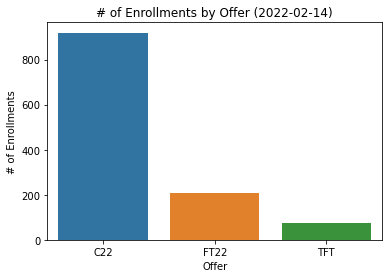

In [240]:
#countplot
ay=sns.countplot(x=enroll_pivot_data['Offer'],data=enroll_pivot_data,order=['C22','FT22','TFT'])
ay.set_title('# of Enrollments by Offer ('+d_date+')')
ay.set_ylabel('# of Enrollments')
plt.show()

## For Checking

In [98]:
fin_enrollments[fin_enrollments['Client ID'].isin([6216])]

,Create Date,Client ID,Offer,Enrollment Date,Enrollment Source
711,2022-02-09 00:00:00,6216,C22,2022-02-09,Salesforce Existing Clients


In [94]:
fin_enrollments=fin_enrollments.fillna('')

In [96]:
fin_enrollments[fin_enrollments['First Name'].str.startswith('ST')]

,Create Date,First Name,Last Name,Email,Phone,Client ID,Offer,Enrollment Date,Enrollment Source
95,2022-02-07 00:00:00,STEVE,STREET,STEVESTREET@WIGHTMAN.CA,5198433767,1423031,C22,2022-02-07,Salesforce Existing Clients
148,2022-02-07 00:00:00,STACEY,ARYA,STACEY@SANEALCAMERA.COM,4033984758,1698670,FT22,2022-02-07,Salesforce Existing Clients
159,2022-02-07 00:00:00,STUART,IMMONEN,STUARTIMMONEN@OUTLOOK.COM,7055713118,1586604,FT22,2022-02-07,Salesforce Existing Clients
164,2022-02-07 00:00:00,STEVE,FEDYNA,FEDYNAS@SHAW.CA,4036781969,456440,C22,2022-02-07,Salesforce Existing Clients
178,2022-02-07 00:00:00,STEPHANE,FILLION,STEPHANE.FILLION@VIDEOTRON.CA,5148872810,7008254,FT22,2022-02-07,Salesforce Existing Clients
221,2022-02-07 00:00:00,STEFAN,DAVIS,STEFAN.DAVIS@MAIL.UTORONTO.CA,6472687958,6968039,FT22,2022-02-07,Salesforce Existing Clients
252,2022-02-07 00:00:00,STEVEN,KLEIN,SJK@SYMPATICO.CA,5144020955,7177014,C22,2022-02-07,Salesforce Existing Clients
305,2022-02-07 00:00:00,STACEY,CHAISSON,STACEYCHAISSON@HOTMAIL.COM,5194961637,7048273,C22,2022-02-07,Salesforce Existing Clients
321,2022-02-07 00:00:00,STEPHANE,BLANCHETTE,MRWHITE183@ICLOUD.COM,5149753941,7101946,C22,2022-02-07,Salesforce Existing Clients
324,2022-02-07 00:00:00,STEPHANIE,GENOIS,STEPHANIE_GENOIS@HOTMAIL.COM,4189323187,956545,C22,2022-02-07,Salesforce Existing Clients


In [113]:
itrade[itrade['Email'].isin(['DAVE.DEUTSCH@OUTLOOK.COM'])]

,ClientUserID,ClientFirstName,ClientLastName,ClientPhoneNumber,ClientEMailAddress,Client_CreateDate,First Name,Last Name,Email,Phone,...,fe,fp,pe,lpe,le,lp,pr_lpe_f,pr_le_f,pr_lp_f,fl
401319,7180630,DAVID,DEUTSCH,613 5187935,DAVE.DEUTSCH@OUTLOOK.COM,2021-11-09 06:30:33,DAVID,DEUTSCH,DAVE.DEUTSCH@OUTLOOK.COM,6135187935,...,DAVIDDAVE.DEUTSCH@OUTLOOK.COM,DAVID6135187935,6135187935DAVE.DEUTSCH@OUTLOOK.COM,DEUTSCH6135187935DAVE.DEUTSCH@OUTLOOK.COM,DEUTSCHDAVE.DEUTSCH@OUTLOOK.COM,DEUTSCH6135187935,NaN,NaN,NaN,DAVIDDEUTSCH
603265,7201200,DAVID,DEUTSCH,6134042836,DAVE.DEUTSCH@OUTLOOK.COM,2022-02-01 16:38:18,DAVID,DEUTSCH,DAVE.DEUTSCH@OUTLOOK.COM,6134042836,...,DAVIDDAVE.DEUTSCH@OUTLOOK.COM,DAVID6134042836,6134042836DAVE.DEUTSCH@OUTLOOK.COM,DEUTSCH6134042836DAVE.DEUTSCH@OUTLOOK.COM,DEUTSCHDAVE.DEUTSCH@OUTLOOK.COM,DEUTSCH6134042836,NaN,NaN,NaN,DAVIDDEUTSCH


In [92]:
ecbe[ecbe['First Name'].isin(['MARTY'])]
ecbe[ecbe['Last Name'].isin(['CHAN'])]

,Create Date,First Name,Last Name,Phone,Email,Offer,Enrollment Date,Enrollment Source,flpe,flp,fle,fe,fp,pe,lpe,le,lp,fl
287,2022-02-16 00:00:00,STELLA,CHAN,7783890028,STELLA_CHAN@TELUS.NET,I just want to enroll in the Cash + up to 500 ...,2022-02-16,Salesforce Existing Clients,STELLACHAN7783890028STELLA_CHAN@TELUS.NET,STELLACHAN7783890028,STELLACHANSTELLA_CHAN@TELUS.NET,STELLASTELLA_CHAN@TELUS.NET,STELLA7783890028,7783890028STELLA_CHAN@TELUS.NET,CHAN7783890028STELLA_CHAN@TELUS.NET,CHANSTELLA_CHAN@TELUS.NET,CHAN7783890028,STELLACHAN


In [88]:
itrade[itrade['ClientUserID'].isin([1652714,
918622,
934518,
7095202])]

,ClientUserID,ClientFirstName,ClientLastName,ClientPhoneNumber,ClientEMailAddress,Client_CreateDate,First Name,Last Name,Email,Phone,...,fe,fp,pe,lpe,le,lp,pr_lpe_f,pr_le_f,pr_lp_f,fl
342435,1652714,MAHESH CORP ID,SHANGHAVI,905-569-6858,MAHESHS@ROGERS.COM,2014-07-21 09:52:38,MAHESHCORPID,SHANGHAVI,MAHESHS@ROGERS.COM,9055696858,...,MAHESHCORPIDMAHESHS@ROGERS.COM,MAHESHCORPID9055696858,9055696858MAHESHS@ROGERS.COM,SHANGHAVI9055696858MAHESHS@ROGERS.COM,SHANGHAVIMAHESHS@ROGERS.COM,SHANGHAVI9055696858,NaN,NaN,NaN,MAHESHCORPIDSHANGHAVI
387973,918622,RAJ,SHANGHAVI,905 5696858,MAHESHS@ROGERS.COM,2009-02-06 08:04:51,RAJ,SHANGHAVI,MAHESHS@ROGERS.COM,9055696858,...,RAJMAHESHS@ROGERS.COM,RAJ9055696858,9055696858MAHESHS@ROGERS.COM,SHANGHAVI9055696858MAHESHS@ROGERS.COM,SHANGHAVIMAHESHS@ROGERS.COM,SHANGHAVI9055696858,NaN,NaN,NaN,RAJSHANGHAVI
572374,7095202,MARTY,CHAN,647 9868485,CHAN.MARTY@GMAIL.COM,2021-01-09 11:18:45,MARTY,CHAN,CHAN.MARTY@GMAIL.COM,6479868485,...,MARTYCHAN.MARTY@GMAIL.COM,MARTY6479868485,6479868485CHAN.MARTY@GMAIL.COM,CHAN6479868485CHAN.MARTY@GMAIL.COM,CHANCHAN.MARTY@GMAIL.COM,CHAN6479868485,NaN,NaN,NaN,MARTYCHAN
710875,934518,HENKUVER,SHANGHAVI,9055696858,MAHESHS@ROGERS.COM,2006-02-01 16:46:48,HENKUVER,SHANGHAVI,MAHESHS@ROGERS.COM,9055696858,...,HENKUVERMAHESHS@ROGERS.COM,HENKUVER9055696858,9055696858MAHESHS@ROGERS.COM,SHANGHAVI9055696858MAHESHS@ROGERS.COM,SHANGHAVIMAHESHS@ROGERS.COM,SHANGHAVI9055696858,NaN,NaN,NaN,HENKUVERSHANGHAVI


In [70]:
itrade[itrade['Last Name'].isin(['GOW'])]
itrade[itrade['Last Name'].str.startswith('WINAR',na=False)]

,ClientUserID,ClientFirstName,ClientLastName,ClientPhoneNumber,ClientEMailAddress,Client_CreateDate,First Name,Last Name,Email,Phone,...,fe,fp,pe,lpe,le,lp,pr_lpe_f,pr_le_f,pr_lp_f,fl
5787,1018060,DANIEL,WINARSKI,519 7254983,DWINARSKI@SYMPATICO.CA,2006-12-06 16:59:47,DANIEL,WINARSKI,DWINARSKI@SYMPATICO.CA,5197254983,...,DANIELDWINARSKI@SYMPATICO.CA,DANIEL5197254983,5197254983DWINARSKI@SYMPATICO.CA,WINARSKI5197254983DWINARSKI@SYMPATICO.CA,WINARSKIDWINARSKI@SYMPATICO.CA,WINARSKI5197254983,NaN,NaN,NaN,DANIELWINARSKI
5788,1018061,JUDITH,WINARSKI,519-725-4983,DWINARSKI@SYMPATICO.CA,2006-12-06 16:59:47,JUDITH,WINARSKI,DWINARSKI@SYMPATICO.CA,5197254983,...,JUDITHDWINARSKI@SYMPATICO.CA,JUDITH5197254983,5197254983DWINARSKI@SYMPATICO.CA,WINARSKI5197254983DWINARSKI@SYMPATICO.CA,WINARSKIDWINARSKI@SYMPATICO.CA,WINARSKI5197254983,NaN,NaN,NaN,JUDITHWINARSKI
71322,1223980,DALE,WINARSKI,7804678309,DALEWINARSKI@HOTMAIL.COM,2009-11-28 06:36:10,DALE,WINARSKI,DALEWINARSKI@HOTMAIL.COM,7804678309,...,DALEDALEWINARSKI@HOTMAIL.COM,DALE7804678309,7804678309DALEWINARSKI@HOTMAIL.COM,WINARSKI7804678309DALEWINARSKI@HOTMAIL.COM,WINARSKIDALEWINARSKI@HOTMAIL.COM,WINARSKI7804678309,NaN,NaN,NaN,DALEWINARSKI
174147,7097811,HENDRIK,WINARTA,604 7298582,HKWINARTA@GMAIL.COM,2021-01-14 22:59:07,HENDRIK,WINARTA,HKWINARTA@GMAIL.COM,6047298582,...,HENDRIKHKWINARTA@GMAIL.COM,HENDRIK6047298582,6047298582HKWINARTA@GMAIL.COM,WINARTA6047298582HKWINARTA@GMAIL.COM,WINARTAHKWINARTA@GMAIL.COM,WINARTA6047298582,NaN,NaN,NaN,HENDRIKWINARTA


In [138]:
d[d['cid'].isin([1686699])]

,Create Date,First Name,Last Name,Phone,Email,Offer,Enrollment Date,Enrollment Source,flpe,flp,...,le,lp,fl,cid_flpe,cid_flp,cid_fle,cid_fe,cid_fp,cid_pe,cid
61,2022-02-04 00:00:00,PERCYSHUNWA,FONG,6476923866,PERCY0629@HOTMAIL.COM,Cash and $4.99 stock and ETF commission pricing.,2022-02-04,Salesforce Existing Clients,PERCYSHUNWAFONG6476923866PERCY0629@HOTMAIL.COM,PERCYSHUNWAFONG6476923866,...,FONGPERCY0629@HOTMAIL.COM,FONG6476923866,PERCYSHUNWAFONG,NaN,NaN,NaN,NaN,NaN,NaN,1686699.0


In [63]:
d[d['Last Name'].isin([''])]

,Create Date,First Name,Last Name,Phone,Email,Offer,Enrollment Date,Enrollment Source,flpe,flp,fle,fe,fp,pe,lpe,le,lp,fl,cid


In [144]:
d_notapprmatched[d_notapprmatched['Last Name'].isin(['MITTON'])]

,Create Date,Client ID,Offer,Enrollment Date,Enrollment Source,First Name,Last Name,Phone,Email


In [113]:
exc[exc["Client ID (Please do not add account numbers)"].isin([6216])]

,Campaign,Client ID (Please do not add account numbers),Card Number (16 digits),Client First Name,Client Last Name,Offer selected,Exception Reason,Enrollment Date (Date since when we should monitor funding),Created,Created By
704,F22 Winter Campaign Exception,6216,4536057612938200,daniel,chow,"Mass, Acquisition & Lifecycle -Free Trades (FT22)",Grant offer to non-targeted clients,2/11/2022,2/11/2022 3:29 PM,"Singh, Hardy"


In [111]:
exc[exc["Client Last Name"].isin(['CHOW'])]

,Campaign,Client ID (Please do not add account numbers),Card Number (16 digits),Client First Name,Client Last Name,Offer selected,Exception Reason,Enrollment Date (Date since when we should monitor funding),Created,Created By


In [109]:
ec[ec['Last Name'].isin(['Chow'])]

,Lead ID,Create Date,First Name,Last Name,Phone,Email,Language Preferred,Lead Source,Lead Owner,Which offer would you like to enroll in?,Wish to be contacted by Scotia iTRADE,Lead Status
47,00Q4w00001RbY4i,11/02/2022,Gloria,Chow,(416) 598-1551,glorialeechow@hotmail.com,English,iTRADE-21Winter Campaign-Existing iTRADE Customer,iTRADE Admin,Cash and $4.99 stock and ETF commission pricing.,0,New
48,00Q4w00001RbY4J,11/02/2022,Paul,Chow,(416) 598-1551,paulchowactuary@hotmail.com,English,iTRADE-21Winter Campaign-Existing iTRADE Customer,iTRADE Admin,Cash and $4.99 stock and ETF commission pricing.,0,New
174,00Q4w00001RbV7g,09/02/2022,Daniel Siu Chuen,Chow,(705) 241-9298,dchow0808@gmail.com,English,iTRADE-21Winter Campaign-Existing iTRADE Customer,iTRADE Admin,Cash and $4.99 stock and ETF commission pricing.,0,New
426,00Q4w00001RbSCW,07/02/2022,Wing-Chi,Chow,(647) 895-3356,wchowid@gmail.com,English,iTRADE-21Winter Campaign-Existing iTRADE Customer,iTRADE Admin,Cash and $4.99 stock and ETF commission pricing.,0,New
496,00Q4w00001RbRyD,07/02/2022,Elsie,Chow,(604) 807-6923,fatlady_no2@hotmail.com,English,iTRADE-21Winter Campaign-Existing iTRADE Customer,iTRADE Admin,Cash and $4.99 stock and ETF commission pricing.,0,New


In [94]:
be[be['First Name'].isin(['Sara'])]

,Lead ID,Create Date,First Name,Last Name,Phone,Email,Language Preferred,Lead Source,Lead Owner,Campaign,BNS Employee Option
103,00Q4w00001RbMsN,31/01/2022,Sara,Ash-Elliott,(780) 499-2889,sara.ashelliott@gmail.com,English,Scotia iTRADE 2021 Winter Campaign - BNS Employee,iTRADE Admin,NaN,I just want to enroll in the Cash + up to 500 ...


In [106]:
ecbe[ecbe['First Name'].isin(['DANIEL'])]

,Create Date,First Name,Last Name,Phone,Email,Offer,Enrollment Date,Enrollment Source,flpe,flp,fle,fe,fp,pe,lpe,le,lp,fl
32,2022-02-11 00:00:00,DANIEL,PROVOST,7059880440,DPROVOST@ALUM.MIT.EDU,Cash and $4.99 stock and ETF commission pricing.,2022-02-11,Salesforce Existing Clients,DANIELPROVOST7059880440DPROVOST@ALUM.MIT.EDU,DANIELPROVOST7059880440,DANIELPROVOSTDPROVOST@ALUM.MIT.EDU,DANIELDPROVOST@ALUM.MIT.EDU,DANIEL7059880440,7059880440DPROVOST@ALUM.MIT.EDU,PROVOST7059880440DPROVOST@ALUM.MIT.EDU,PROVOSTDPROVOST@ALUM.MIT.EDU,PROVOST7059880440,DANIELPROVOST
214,2022-02-08 00:00:00,DANIEL,MCVICAR,2507587757,DANNYMCVICAR@TELUS.NET,Cash and $4.99 stock and ETF commission pricing.,2022-02-08,Salesforce Existing Clients,DANIELMCVICAR2507587757DANNYMCVICAR@TELUS.NET,DANIELMCVICAR2507587757,DANIELMCVICARDANNYMCVICAR@TELUS.NET,DANIELDANNYMCVICAR@TELUS.NET,DANIEL2507587757,2507587757DANNYMCVICAR@TELUS.NET,MCVICAR2507587757DANNYMCVICAR@TELUS.NET,MCVICARDANNYMCVICAR@TELUS.NET,MCVICAR2507587757,DANIELMCVICAR
505,2022-02-07 00:00:00,DANIEL,HILTON,6045623540,DANH28@GMAIL.COM,Cash and $4.99 stock and ETF commission pricing.,2022-02-07,Salesforce Existing Clients,DANIELHILTON6045623540DANH28@GMAIL.COM,DANIELHILTON6045623540,DANIELHILTONDANH28@GMAIL.COM,DANIELDANH28@GMAIL.COM,DANIEL6045623540,6045623540DANH28@GMAIL.COM,HILTON6045623540DANH28@GMAIL.COM,HILTONDANH28@GMAIL.COM,HILTON6045623540,DANIELHILTON


In [76]:
ec[ec['First Name'].isin(['jaskaransingh'])]

,Lead ID,Create Date,First Name,Last Name,Phone,Email,Language Preferred,Lead Source,Lead Owner,Which offer would you like to enroll in?,Wish to be contacted by Scotia iTRADE,Lead Status


In [127]:
na[na['ClientUserID'].isin([1125686])]

,AccountNumber,ClientUserID,ReferralType,Account_CreateDate,Client_CreateDate,Description
430,57557095,1125686,233,2022-02-04 11:11:03,2008-08-29 14:46:11,Cash Offer


In [118]:
na_2[na_2['Client ID'].isin([7200596])]

,Create Date,Client ID,Offer,Enrollment Date,Enrollment Source
415,2022-02-04 00:46:42,7200596,Cash Offer,2022-02-04,New Account Query


In [72]:
ecbe[ecbe["First Name"].isin(["JASKARANSINGH"])]

,Create Date,First Name,Last Name,Phone,Email,Offer,Enrollment Date,Enrollment Source,flpe,flp,fle,fe,fp,pe,lpe,le,lp,fl
39,2022-02-18 00:00:00,JASKARANSINGH,TAKHTAR,2048696974,TAKHTAR.JASKARAN@GMAIL.COM,Free stock and ETF trades.,2022-02-18,Salesforce Existing Clients,JASKARANSINGHTAKHTAR2048696974TAKHTAR.JASKARAN...,JASKARANSINGHTAKHTAR2048696974,JASKARANSINGHTAKHTARTAKHTAR.JASKARAN@GMAIL.COM,JASKARANSINGHTAKHTAR.JASKARAN@GMAIL.COM,JASKARANSINGH2048696974,2048696974TAKHTAR.JASKARAN@GMAIL.COM,TAKHTAR2048696974TAKHTAR.JASKARAN@GMAIL.COM,TAKHTARTAKHTAR.JASKARAN@GMAIL.COM,TAKHTAR2048696974,JASKARANSINGHTAKHTAR


In [84]:
ecbe[ecbe["Last Name"].isin(["EMERY"])]

,Create Date,First Name,Last Name,Phone,Email,Offer,Enrollment Date,Enrollment Source,flpe,flp,fle,fe,fp,pe,lpe,le,lp,fl


In [81]:
ec[ec["Last Name"].isin(["Takhtar"])]

,Lead ID,Create Date,First Name,Last Name,Phone,Email,Language Preferred,Lead Source,Lead Owner,Which offer would you like to enroll in?,Wish to be contacted by Scotia iTRADE,Lead Status
41,00Q4w00001RbquS,18/02/2022,Jaskaran singh,Takhtar,(204) 869-6974,takhtar.jaskaran@gmail.com,English,iTRADE-21Winter Campaign-Existing iTRADE Customer,Nilen Thamphirasan,Free stock and ETF trades.,1,New


In [ ]:
itrade.loc[(itrade['First Name']=='CRAIG') & (itrade['Last Name']=='LEVANGIE')]

,ClientUserID,ClientFirstName,ClientLastName,ClientPhoneNumber,ClientEMailAddress,Client_CreateDate,First Name,Last Name,Email,Phone,...,fe,fp,pe,lpe,le,lp,pr_lpe_f,pr_le_f,pr_lp_f,fl
363734,574813,CRAIG,LEVANGIE,902 4353299,CRAIG.LEVANGIE@SCOTIABANK.COM,2011-07-25 13:20:05,CRAIG,LEVANGIE,CRAIG.LEVANGIE@SCOTIABANK.COM,9024353299,...,CRAIGCRAIG.LEVANGIE@SCOTIABANK.COM,CRAIG9024353299,9024353299CRAIG.LEVANGIE@SCOTIABANK.COM,LEVANGIE9024353299CRAIG.LEVANGIE@SCOTIABANK.COM,LEVANGIECRAIG.LEVANGIE@SCOTIABANK.COM,LEVANGIE9024353299,NaN,NaN,NaN,CRAIGLEVANGIE


In [83]:
fn='JOSHUA'
ln='LIEBLEIN'
itrade.loc[(itrade['First Name'].str.contains(fn,na=False)) & (itrade['Last Name'].isin([ln]))]

,ClientUserID,ClientFirstName,ClientLastName,ClientPhoneNumber,ClientEMailAddress,Client_CreateDate,First Name,Last Name,Email,Phone,...,fe,fp,pe,lpe,le,lp,pr_lpe_f,pr_le_f,pr_lp_f,fl
354922,7201431,JOSHUA,LIEBLEIN,6474676763,RUBY@REUBENLIEBLEIN.COM,2022-02-02 14:18:51,JOSHUA,LIEBLEIN,RUBY@REUBENLIEBLEIN.COM,6474676763,...,JOSHUARUBY@REUBENLIEBLEIN.COM,JOSHUA6474676763,6474676763RUBY@REUBENLIEBLEIN.COM,LIEBLEIN6474676763RUBY@REUBENLIEBLEIN.COM,LIEBLEINRUBY@REUBENLIEBLEIN.COM,LIEBLEIN6474676763,NaN,NaN,NaN,JOSHUALIEBLEIN


In [235]:
itrade.loc[(itrade['Phone'].isin(['4032542337']))]

,ClientUserID,ClientFirstName,ClientLastName,ClientPhoneNumber,ClientEMailAddress,Client_CreateDate,First Name,Last Name,Email,Phone,...,fle,fe,fp,pe,lpe,le,lp,pr_lpe_f,pr_le_f,pr_lp_f


In [198]:
fuzz.partial_ratio('MIKE','MICHAEL')

50

In [140]:
#ec[ec['First Name'].isin(['Stephane'])]
ec[ec['First Name'].str.startswith("Julie",na=False)]

,Lead ID,Create Date,First Name,Last Name,Phone,Email,Language Preferred,Lead Source,Lead Owner,Which offer would you like to enroll in?,Wish to be contacted by Scotia iTRADE
16,00Q4w00001RbMFj,2022-01-29,Juliette,Merritt,(902) 870-1937,capebluejewels@gmail.com,English,iTRADE-21Winter Campaign-Existing iTRADE Customer,iTRADE Admin,Cash and $4.99 stock and ETF commission pricing.,1
31,00Q4w00001RbM3Y,2022-01-29,Julien,Ragbeer,(416) 671-6114,jragbeer@gmail.com,English,iTRADE-21Winter Campaign-Existing iTRADE Customer,iTRADE Admin,Cash and $4.99 stock and ETF commission pricing.,0
338,00Q4w00001RbK5b,2022-01-26,Juliet,Francis,(647) 807-3360,kisliving333@gmail.com,English,iTRADE-21Winter Campaign-Existing iTRADE Customer,iTRADE Admin,Cash and $4.99 stock and ETF commission pricing.,0


In [141]:
#be[be['Last Name'].isin(['Ba'])]
be[be['First Name'].str.startswith("Julie",na=False)]

,Lead ID,Create Date,First Name,Last Name,Phone,Email,Language Preferred,Lead Source,Lead Owner,Campaign,BNS Employee Option
13,00Q4w00001RbM4R,2022-01-29,Julie,Turner,(613) 809-0297,azwturner@sympatico.ca,English,Scotia iTRADE 2021 Winter Campaign - BNS Employee,iTRADE Admin,NaN,I just want to enroll in the Cash + up to 500 ...


# Test

In [ ]:
dups=all_enrollments[all_enrollments['Client ID'].duplicated(keep=False)]
dups.sort_values('Client ID')

In [323]:
df['v_5'] = np.where(~df['pfv'].isnull(),df['pfv'],df['v_5']))
df['real_lastName'] = np.where(df['LastName'].isnull(), df['Middle'], df['LastName'] )

a['cid'] = np.where(~a['cid_flpe'].isnotnull())



if a['cid_flpe']=="":
    a['cid']=a['cid_flpe']

SyntaxError: unmatched ')' (1/ipykernel_20268/3877912106.py, line 1)

In [166]:
datax = {'fn':  ['jo+', 'Jej','BEN','maa','','take','BEN'],
        'ln': ['u+errr', np.nan,'DAN','ppppp',np.nan,np.nan,'efd'],
       'ph':['(647) 561-3467',np.nan,'55433322',np.nan,'','','22']}
x=pd.DataFrame(datax)

x["fn"]=x['fn'].str.upper()
x['fn']=x['fn'].str.replace(r'[^a-zA-Z]', '',regex=True)

x["ln"]=x['ln'].str.upper()
x['ln']=x['ln'].str.replace(r'[^a-zA-Z]', '',regex=True)

x['ph']=x['ph'].str.replace(r'\D+','', regex=True)

x

,fn,ln,ph
0,JO,UERRR,6475613467
1,JEJ,NaN,NaN
2,BEN,DAN,55433322
3,MAA,PPPPP,NaN
4,,NaN,
5,TAKE,NaN,
6,BEN,EFD,22


In [167]:
x.sort_values('ph')

,fn,ln,ph
4,,NaN,
5,TAKE,NaN,
6,BEN,EFD,22
2,BEN,DAN,55433322
0,JO,UERRR,6475613467
1,JEJ,NaN,NaN
3,MAA,PPPPP,NaN


In [168]:
x.drop_duplicates('ln')

,fn,ln,ph
0,JO,UERRR,6475613467
1,JEJ,NaN,NaN
2,BEN,DAN,55433322
3,MAA,PPPPP,NaN
6,BEN,EFD,22


In [1]:
datay = {'cid':['1234','2222','2'],
        'fn':  ['', 'Ben','BEN'],
        'ln': ['LINCOLN', 'DAN','DAN'],
       'ph':['(647) 561-3467','55433322','55433322']}
y=pd.DataFrame(datay)

y["fn"]=y['fn'].str.upper()
y['fn']=y['fn'].str.replace(r'[^a-zA-Z]', '',regex=True)

y["ln"]=y['ln'].str.upper()
y['ln']=y['ln'].str.replace(r'[^a-zA-Z]', '',regex=True)

y['ph']=y['ph'].str.replace(r'\D+','', regex=True)

y

NameError: name 'pd' is not defined

In [224]:
y[y['fn']=='']

,cid,fn,ln,ph
0,1234,,LINCOLN,6475613467


In [216]:
y[y['ph']==y['ph'].max()]

,cid,fn,ln,ph
0,1234,ABRAHAM,LINCOLN,6475613467


In [217]:
pd.merge(x,y[['cid','fn']],left_on='fn',right_on='fn',how='left')

,fn,ln,ph,cid
0,JO,UERRR,6475613467,NaN
1,JEJ,NaN,NaN,NaN
2,BEN,DAN,55433322,2
3,MAA,PPPPP,NaN,NaN
4,,NaN,,NaN
5,TAKE,NaN,,NaN
6,BEAN,EFD,22,NaN


In [139]:
join_map = {i['fn']:i['ph'] for ind,i in x.iterrows()}
join_map

{'JO': '6475613467', 'JEJ': nan, nan: '', '': '', 'BEAN': '22'}

In [154]:
for ind,val in join_map.items():
    print(ind,val)

JO 6475613467
JEJ nan
nan 
 
BEAN 22


In [220]:
for i,i_row in x[2:3].iterrows():

    #1. flp%
    #temp_1= y['cid'].loc[y['flp'].str.startswith(i_row['flp'],na=False)]#.values
    #find_df.loc[i,'cid_flp%']=str(temp_1)[1:-1]
    #if temp_1.size != 0:
    #    find_df.loc[i,'cid_f%lpe']=temp_1.values[0]
    #del temp_1
    
    #2. =lastname & =trim(phone) & = upper(email) & First Name%
    temp_2= y.loc[(y['ln']==i_row['ln']) & (y['ph']==i_row['ph'])]
    temp_2= temp_2['cid'].loc[temp_2['fn'].str.startswith(i_row['fn'],na=False)]#.values
    #find_df.loc[i,'cid_f%lpe']=str(temp_2)[1:-1]
    if temp_2.size != 0:
        x.loc[i,'cid_f%lpe']=temp_2.values[0]
    #del temp_2
    
temp_2
x

,fn,ln,ph,cid_f%lpe
0,JO,UERRR,6475613467,NaN
1,JEJ,NaN,NaN,NaN
2,BEN,DAN,55433322,2222
3,MAA,PPPPP,NaN,NaN
4,,NaN,,NaN
5,TAKE,NaN,,NaN
6,BEAN,EFD,22,NaN


In [153]:
join_map = {i['fn']:i['ph'] for key,i in x.iterrows()}
join_map
df1['Category'] = df1['Description'].apply(lambda x: [val for key,val in join_map.items() if key in x][0] if [val for key,val in join_map.items() if key in x] else None)

{'JO': '6475613467', 'JEJ': nan, nan: '', '': '', 'BEAN': '22'}

In [177]:
datax = {'cid':['1234','2222','0000','9999','0111','0111','929929'],
        'fn':  ['BEAN', 'TAKE',np.nan,'OOW','jpo','poop','Poop'],
        'ln': ['u+dD', 'sm4sd55','ee','mondays',"lo",'first','second'],
       'ph':['(647) 561-3467','554.333.22','rr','33','0999','1432','1432']}
x=pd.DataFrame(datax)
x

,cid,fn,ln,ph
0,1234,BEAN,u+dD,(647) 561-3467
1,2222,TAKE,sm4sd55,554.333.22
2,0000,NaN,ee,rr
3,9999,OOW,mondays,33
4,0111,jpo,lo,0999
5,0111,poop,first,1432
6,929929,Poop,second,1432


In [178]:
x.sort_values(['cid'])

,cid,fn,ln,ph
2,0000,NaN,ee,rr
4,0111,jpo,lo,0999
5,0111,poop,first,1432
0,1234,BEAN,u+dD,(647) 561-3467
1,2222,TAKE,sm4sd55,554.333.22
6,929929,Poop,second,1432
3,9999,OOW,mondays,33


In [9]:
x[x['fn'].duplicated(keep=False)]

,cid,fn,ln,ph


In [15]:
datay = {'fn':  ['TAKE', np.nan,'OOM','poop','PooP'],
        'ln': ['u+dD', 'sm4sd55','ee','first','moo'],
       'ph':['(647) 561-3467','554.333.22','rr','1432','9009'],
        'cid':['','','','','']}
y=pd.DataFrame(datay)
y

,fn,ln,ph,cid
0,TAKE,u+dD,(647) 561-3467,
1,NaN,sm4sd55,554.333.22,
2,OOM,ee,rr,
3,poop,first,1432,
4,PooP,moo,9009,


In [31]:
#x.merge(y.notnull(),on='fn',how='left')
x.merge(y.dropna(subset=['fn','ln']), on='fn', how='left')

,cid_x,fn,ln_x,ph_x,ln_y,ph_y,cid_y
0,1234,BEAN,u+dD,(647) 561-3467,NaN,NaN,NaN
1,2222,TAKE,sm4sd55,554.333.22,u+dD,(647) 561-3467,
2,0000,NaN,ee,rr,NaN,NaN,NaN
3,9999,OOW,mondays,33,NaN,NaN,NaN
4,0111,jpo,lo,0999,NaN,NaN,NaN
5,010101,poop,first,1432,first,1432,
6,929929,poop,second,1432,first,1432,


In [16]:
y=y.drop_duplicates(['fn'])
y

,fn,ln,ph,cid
0,TAKE,u+dD,(647) 561-3467,
1,NaN,sm4sd55,554.333.22,
2,OOM,ee,rr,
3,poop,first,1432,
4,PooP,moo,9009,


In [164]:
pd.merge(y,x[['cid','fn']],left_on='fn',right_on='fn',how='left')

,fn,ln,ph,cid_x,cid_y
0,TAKE,u+dD,(647) 561-3467,,NaN
1,BEA,sm4sd55,554.333.22,,NaN
2,OOM,ee,rr,,NaN
3,poop,first,1432,,010101
4,poop,first,1432,,929929


In [86]:
join_map = {i['fn']:i['cid'] for key,i in x.iterrows()} 
join_map

{'BEAN': '1234', 'TAK': '2222', 'BOOOM': '0000', 'OOW': '9999', 'jpo': '0111'}

In [94]:
join_map = {i['fn']:i['cid'] for key,i in x.iterrows()} 
y['cid']=y['fn'].apply(lambda x: [val for key,val in join_map.items() if key in x ][0] if [val for key,val in join_map.items() if key in x] else None)
y

,fn,ln,ph,cid
0,TAKE,u+dD,(647) 561-3467,2222
1,BEA,sm4sd55,554.333.22,None
2,OOM,ee,rr,None


In [93]:
if "ABCD" in "ABC":
    print("True")
else:
    print("False")

False


In [480]:
#https://datatofish.com/substring-pandas-dataframe/
# %fn
for i,row in y.iterrows():
    contain_values = x[x['fn'].str.startswith(row['fn'],na=False)]
    values= contain_values.loc[(contain_values['ln']=='u+dD') & (contain_values['ph']=='(647) 561-3467'),'cid'].values
    row['cid']=str(values)[2:-2]

'''
for i,row in y.iterrows():
    if(pd.isnull(row['cid'])):
        print('true')
        
y.loc[y['cid']=='']
'''
y



,fn,ln,ph,cid
0,TAKE,u+dD,(647) 561-3467,
1,BEA,sm4sd55,554.333.22,1234
2,OOM,ee,rr,


In [286]:
#https://datatofish.com/substring-pandas-dataframe/
# %fn%
for i,row in y.iterrows():
    contain_values = x[x['fn'].str.contains(row['fn'])]
    print (contain_values)
    

Empty DataFrame
Columns: [cid, fn, ln, ph]
Index: []
    cid    fn    ln              ph
0  1234  BEAN  u+dD  (647) 561-3467
    cid     fn  ln  ph
2  0000  BOOOM  ee  rr


In [ ]:
dataFrameOut = y[['column name'].str.contains('string')]
dataFrameOut

In [280]:
x['cid']=np.where(x['fn'].isnull(),np.nan,x['fn'])
x

,fn,ln,ph,cid
0,JO,UERRR,6475613467,JO
1,JEJ,NaN,NaN,JEJ
2,NaN,EEEE,4324432,NaN
3,NaN,PPPPP,NaN,NaN
4,,NaN,,
5,NaN,NaN,,NaN


In [281]:
x.loc[x['cid'].isnull(),'cid'] = x['ln']
x

,fn,ln,ph,cid
0,JO,UERRR,6475613467,JO
1,JEJ,NaN,NaN,JEJ
2,NaN,EEEE,4324432,EEEE
3,NaN,PPPPP,NaN,PPPPP
4,,NaN,,
5,NaN,NaN,,NaN


In [239]:
dataa_abc = {'cid':['2222','2222','1'],
        'date':  ['2022-01-04', '2022-01-03','2022-01-06'],
         'status':['two','two','two']}
data_abc=pd.DataFrame(dataa_abc)
data_abc['date']=data_abc['date'].astype('datetime64[ns]')


data_abc

,cid,date,status
0,2222,2022-01-04,two
1,2222,2022-01-03,two
2,1,2022-01-06,two


In [244]:
data_abc=data_abc.drop_duplicates(subset=['cid','status'])#('cid',keep='last')
data_abc

,cid,date,status
0,2222,2022-01-04,two
2,1,2022-01-06,two


In [30]:
data_abc=data_abc.sort_values('date').drop_duplicates('cid',keep='first')
data_abc

,cid,date,status
1,2222,2022-01-03,one
2,1,2022-01-06,yes


In [197]:
dataa_abc = {'cid':['V','V','2222','1'],
        'date':  ['2022-12-05','2022-12-04', '2022-01-04','2022-01-06'],
         'status':['one','one','two','yes']}
data_abc=pd.DataFrame(dataa_abc)
data_abc['date']=data_abc['date'].astype('datetime64[ns]')
data_abc=data_abc.sort_values('date').drop_duplicates(('cid','status'),keep='last')

data_abc

,cid,date,status
2,2222,2022-01-04,two
3,1,2022-01-06,yes
0,V,2022-12-05,one


In [ ]:
data_abc.drop_duplicates()

In [22]:
data_abc

,cid,date,status
0,V,2022-01-04,one
1,V,2022-01-04,one
2,2222,2022-01-04,two
3,1,2022-01-06,yes


In [49]:
data_abc=data_abc.sort_values('date').drop_duplicates(['cid','date'],keep='last')
data_abc

,cid,date,status
1,2222,2022-01-04,two
2,1,2022-01-06,yes


In [ ]:
a['cid'] = np.where(a['cid_flpe'].isnull(), np.nan, a['cid_flpe'] )
a['cid']

In [279]:
data = {'month': ['January','February','March','April','May','June','July','August','September','October','November','December'],
        'days_in_month': [31,28,31,30,31,30,31,31,30,31,30,31]
        }

df = pd.DataFrame(data, columns = ['month', 'days_in_month'])

contain_values = df[df['month'].str.contains('Jun')]
print (contain_values)

  month  days_in_month
5  June             30


In [103]:
test=ec['First Name'].str.encode('utf-8').str.decode('ascii', 'ignore')
test

0          Keith
1         Marvin
2          James
3          Marie
4          Isaac
         ...    
237       Sherry
238     caroline
239        Sevag
240    Catherine
241       Martin
Name: First Name, Length: 242, dtype: object

In [ ]:
df_new = df.query("A==0")

In [ ]:
df3 = df1.merge(df2, on='Number', how='left')
df3['Matching'] = np.where(df3.Productdetailed == df3.Item, 'Matched', 'No Match')
df3.drop('Productdetailed', axis=1, inplace=True)